In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append("../..")

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from nim.models import Net, generate
from utils import count_arrival

In [5]:
def f(t, a, b, c, d, e):
    return a * np.cos(b * t + c) * np.exp(-d * t) + e

In [9]:
x = np.load("train.npy")
n, T = x.shape
x = np.log(x)
mean = x.mean(axis=0)
t = np.arange(T)
params = np.load("params.npy")

t_new = np.arange(200)
mean_fit = f(t_new, *params)

In [10]:
net = Net.load_from_checkpoint("model.ckpt")
decoder = net.decoder
n, t = 4000, 200
x = generate(decoder, size=(n, t))
x = x.numpy().reshape(n, t)
x += mean_fit
x = np.exp(x)

In [11]:
t, rate = count_arrival(x, 0.2, max_=50)
rate = rate.mean(axis=0)
true_rate = 0.5 * np.sin(np.pi / 5 * t) + 2

Text(0, 0.5, 'Rate')

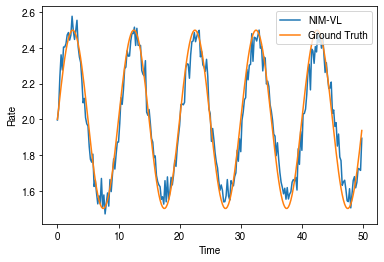

In [14]:
plt.plot(t, rate, label="NIM-VL")
plt.plot(t, true_rate, label="Ground Truth")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Rate")